<a href="https://colab.research.google.com/github/Vaishnavi741/STOCK-PREDICTION12/blob/main/LINEAR_REGRESSION_USING_PAST_VALUES(F4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
dir="/content/drive/MyDrive/Colab Notebooks/Aug31_Price_series (1).xlsx"
data=pd.read_excel(dir,index_col='time HHMMSS')

In [ ]:
data

,Spot price ltp NIFTY50,Price of Synthetic option derived future,price NIFTY23AUGFUT
time HHMMSS,,,
09:15:01,19375.55,19358.529510,19359.125
09:15:10,19361.80,19338.013578,19340.300
09:15:51,19358.50,19341.881400,19342.100
09:16:31,19374.25,19355.645595,19355.450
09:17:11,19374.25,19355.705598,19356.450
...,...,...,...
15:26:59,19262.45,19253.006319,19251.850
15:27:39,19272.85,19253.304164,19252.500
15:28:19,19283.15,19254.661953,19253.200


In [ ]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

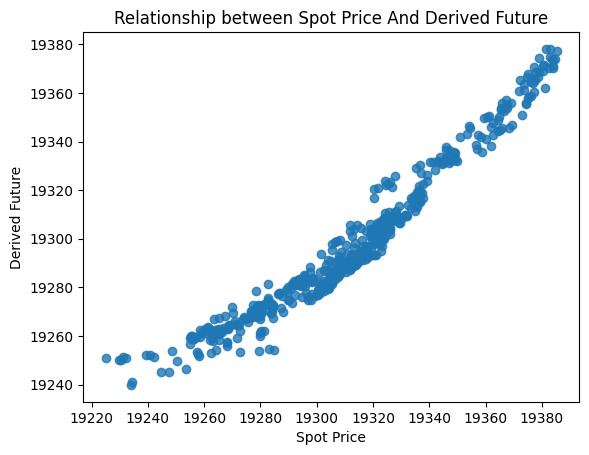

In [ ]:
plt.scatter(data['Spot price ltp NIFTY50'],data['Price of Synthetic option derived future'],alpha=0.8)
plt.title('Relationship between Spot Price And Derived Future')
plt.xlabel('Spot Price')
plt.ylabel('Derived Future')
plt.show()

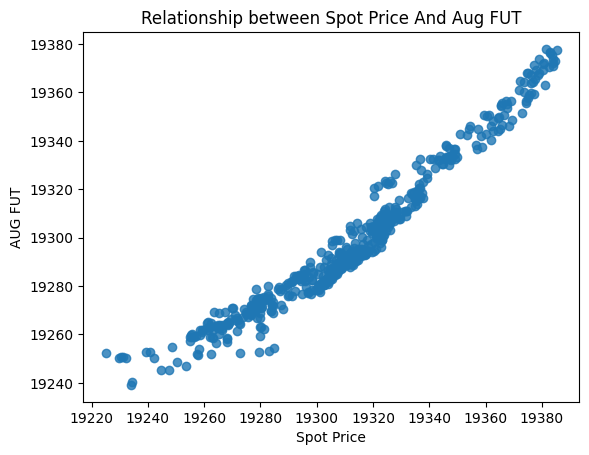

In [ ]:
plt.scatter(data['Spot price ltp NIFTY50'],data['price NIFTY23AUGFUT'],alpha=0.8)
plt.title('Relationship between Spot Price And Aug FUT')
plt.xlabel('Spot Price')
plt.ylabel('AUG FUT')
plt.show()

In [ ]:
#print(data['Spot price ltp NIFTY50'].iloc[0])

data['spot price past values']=data['Spot price ltp NIFTY50'].rolling(window=2).mean()
data.fillna(data['Spot price ltp NIFTY50'].iloc[0],inplace=True)

In [ ]:
X = data[['price NIFTY23AUGFUT','Price of Synthetic option derived future','spot price past values']]
y = data['Spot price ltp NIFTY50']
scaler=StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False,random_state = 0)
X_train_normalized = scaler.fit_transform(x_train)
X_test_normalized = scaler.transform(x_test)



In [ ]:
regressor=LinearRegression()
model=regressor.fit(X_train_normalized,y_train)
regressor.intercept_,regressor.coef_

(19322.763116591923, array([ 0.06751464,  2.14337501, 23.63888317]))

In [ ]:
y_pred_train=regressor.predict(X_train_normalized)
y_pred=regressor.predict(X_test_normalized)

In [ ]:

#Evaluation metrics
accuracy=model.score(X_train_normalized,y_train)
accuracy1=model.score(X_test_normalized,y_test)
print("Training Accuracy:", accuracy)
print("Testing  Accuracy:", accuracy1)
print("MSE(Testing): ",mean_squared_error(y_test, y_pred))
print("MSE(Training): ",mean_squared_error(y_train, y_pred_train))
print("RMSE(Training):",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("RMSE(Testing):",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score(TR): ",r2_score(y_train, y_pred_train))
print("R2 Score(Testing): ",r2_score(y_pred, y_test))

Training Accuracy: 0.9964307915150166
Testing  Accuracy: 0.9625903150348417
MSE(Testing):  7.432281295111432
MSE(Training):  2.384621486234975
RMSE(Training): 1.5442219679291493
RMSE(Testing): 2.726221064974635
R2 Score(TR):  0.9964307915150166
R2 Score(Testing):  0.9578121407743779


Text(0.5, 1.0, 'Actual Vs Predicted Price in Testing Data (F4)')

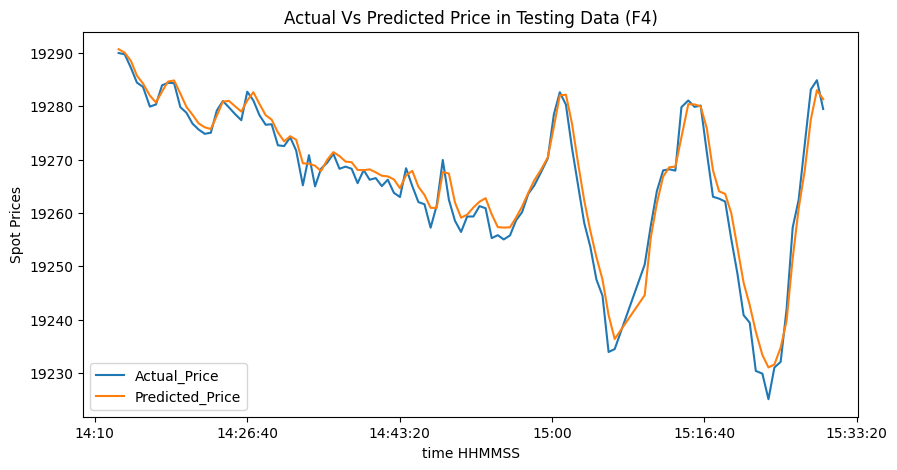

In [ ]:
#FIGURE
dfr=pd.DataFrame({'Actual_Price':y_test, 'Predicted_Price':y_pred})
dfr.loc[:,['Actual_Price','Predicted_Price']].plot( mark_right=False, figsize = (10,5),grid=False)
plt.ylabel("Spot Prices")
plt.title("Actual Vs Predicted Price in Testing Data (F4)")
